# To Be or Not To Be

## Introduction

The dataset used in this project contains all character/player lines from all of Shakespeare's plays. The purpose of this project is to use feature engineering to generate new information that can be used in a classification model to determine which player is speaking. In other words, provided a player line, ideally the model will be able to predict which player is speaking.

In [318]:
import numpy as np

In [319]:
import pandas as pd

In [320]:
import matplotlib.pyplot as plt

In [321]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model

In [322]:
dfShake=pd.read_csv("file://localhost/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-2-Khan/Data/RawData/Shakespeare_data.csv")

By observing the data visually, it is apparent there are missing values throughout the data. This will require cleaning, which will be completed next. In order to establish additional value, I would like to aggregate the PlayerLines into single rows so that each player's consecutive lines will be stored as a single quote. Once I have completed this aggregation, I can come up with useful variables based on that quote that will be used as features in the classification model. A few ideas that come to mind are: number of words per player line, average sentence length (per player line), number of sentences per player line.

In [323]:
dfShake

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


## Data Cleaning

If Player doesn't exist (Player=NaN), I delete those observations, because the associated PlayerLine is not spoken by anyone (example: PlayerLine=ACT I).

If ActSceneLine doesn't exist (ActSceneLine=NaN), I delete those observations, because the associated PlayerLine is a stage direction and therefore is not spoken by anyone (example: ActSceneLine=SCENE III. London. The palace.).

In the dropna command, inplace=True because we want the dataframe itself to be changed (as opposed to creating a copy of the dataframe)

In [324]:
dfShake.dropna(subset = ["Player"], inplace=True)

In [325]:
dfShake.dropna(subset = ["ActSceneLine"], inplace=True)

I now want to verify there are no more missing values in the dataset. Since the number of entries matches the non-null count for all variables, we know there are no more missing values.

In [326]:
dfShake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105152 entries, 3 to 111394
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dataline          105152 non-null  int64  
 1   Play              105152 non-null  object 
 2   PlayerLinenumber  105152 non-null  float64
 3   ActSceneLine      105152 non-null  object 
 4   Player            105152 non-null  object 
 5   PlayerLine        105152 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [327]:
dfShake.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


For ease of data navigation, I will reset the data indices so that the rows begin at 0 and continue consecutively. This will also be done later as more rows are removed from the dataset.

In [328]:
dfShake=dfShake.reset_index()

In [329]:
dfShake

,index,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...,...,...
105147,111390,111391,A Winters Tale,38.0,5.3.179,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
105148,111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
105149,111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
105150,111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first


I will now convert Player and PlayerLine from objects to strings so that I can easily compare the strings for cleaning purposes.

In [330]:
dfShake.dtypes

index                 int64
Dataline              int64
Play                 object
PlayerLinenumber    float64
ActSceneLine         object
Player               object
PlayerLine           object
dtype: object

In [331]:
dfShake['Player'] = dfShake['Player'].astype("string")
dfShake['PlayerLine'] = dfShake['PlayerLine'].astype("string")

In [332]:
dfShake.dtypes

index                 int64
Dataline              int64
Play                 object
PlayerLinenumber    float64
ActSceneLine         object
Player               string
PlayerLine           string
dtype: object

There is still a problem with the data: The player name "ANTIPHOLUS OF EPHESUS" has been inadvertently split. "ANTIPHOLUS" is split off from the rest of its name, and placed incorrectly in an extra PlayerLine.

I run the string strip command on PlayerLine to verify there are no extra spaces stored in the string, which would make comparison of strings difficult.

In [333]:
dfShake.PlayerLine = dfShake.PlayerLine.str.strip()

I now check the data for how many times this occurs: in the below loop I print a few of the occurrences for demonstration purposes (but I don't print all of them since there are 175 of them). Then in the following for loop, I drop the rows of data where this occurs because they contain no additional information (only ANTIPHOLUS is stored in that line). I then reset the indices so the for loops will run properly.

In [334]:
count=0
for i in range(0,(len(dfShake['PlayerLine']))):
    if(dfShake['PlayerLine'][i] == 'ANTIPHOLUS'):
        count=count+1
        if count<3:
            print(dfShake['PlayerLine'][i], dfShake['Dataline'][i])
            
print('Times this error occurs =', count) 

ANTIPHOLUS 22600
ANTIPHOLUS 22612
Times this error occurs = 175


In [335]:
for i in range(0,(len(dfShake['PlayerLine']))):
    if(dfShake['PlayerLine'][i] == 'ANTIPHOLUS'):
        dfShake.drop([i],inplace=True, axis=0)

In [336]:
dfShake=dfShake.reset_index()

I now add the rest of ANTIPHOLUS' name to the appropriate rows in the data (that previously said "OF EPHESUS")

In [337]:
for i in range(0,len(dfShake['Player'])):
    if(dfShake['Player'][i] == 'OF EPHESUS'):
        dfShake['Player'][i]='ANTIPHOLUS OF EPHESUS'

There is also a problem with the player "DROMIO OF SYRACUSE". His whole name isn't stored in Player consistently. On occasion, DROMIO is left off but is not stored anywhere else. I print the number of times this happens and update his name where appropriate.

In [338]:
count=0
for i in range(0,(len(dfShake['Player']))):
    if(dfShake['Player'][i] == 'OF SYRACUSE'):
        count=count+1
        if count<3:
            print(dfShake['Player'][i], dfShake['Dataline'][i])

print('Times this error occurs =', count) 

OF SYRACUSE 22601
OF SYRACUSE 22602
Times this error occurs = 269


In [339]:
for i in range(0,len(dfShake['Player'])):
    if(dfShake['Player'][i] == 'OF SYRACUSE'):
        dfShake['Player'][i]='DROMIO OF SYRACUSE'

In [340]:
#dfShake.to_csv('test.csv')

Now as discussed earlier, I am going to combine player lines so that the entire quote is contained in a single observation. Each player's consecutive lines will be aggregated and stored as a single quote. Note: if a player is having a conversation with another player, each line would be stored as its own quote. Only **consecutive** player lines are combined.

In [341]:
dfShake=dfShake.groupby(['Play','PlayerLinenumber', 'Player'], as_index = False).agg({'PlayerLine': ' '.join})

In [342]:
dfShake

,Play,PlayerLinenumber,Player,PlayerLine
0,A Comedy of Errors,1.0,ADRIANA,"Neither my husband nor the slave return'd, Tha..."
1,A Comedy of Errors,1.0,AEGEON,"Proceed, Solinus, to procure my fall And by th..."
2,A Comedy of Errors,1.0,ANGELO,"I am sorry, sir, that I have hinder'd you, But..."
3,A Comedy of Errors,1.0,ANTIPHOLUS OF EPHESUS,"Good Signior Angelo, you must excuse us all, M..."
4,A Comedy of Errors,1.0,DROMIO OF SYRACUSE,The gold I gave to Dromio is laid up Safe at t...
...,...,...,...,...
22212,macbeth,61.0,MALCOLM,Dispute it like a man.
22213,macbeth,62.0,MACDUFF,"I shall do so, But I must also feel it as a ma..."
22214,macbeth,63.0,MALCOLM,Be this the whetstone of your sword: let grief...
22215,macbeth,64.0,MACDUFF,"O, I could play the woman with mine eyes And b..."


## Feature Engineering

I can now come up with variables that will be used as features in the classification model.

First, I will create a new variable that contains the number of words in each player line/quote. This variable will be called quoteLength. It can be useful if there are certain characters that tend to talk a lot more than others. If one player always speaks in single word lines, that player will be easily predicted based on the number of words they use. Alternatively, if another player always has an average of 200 word quotes, they will also be easily predictable. 

In [343]:
quoteLength = []
for x in range(0,len(dfShake['PlayerLine'])):
    quoteLength.append(len(dfShake['PlayerLine'][x].split()))
    #dfShake.assign(quoteLength=len(dfShake['PlayerLine'][x].split()))
dfShake['quoteLength'] = quoteLength

In [344]:
dfShake.head()

,Play,PlayerLinenumber,Player,PlayerLine,quoteLength
0,A Comedy of Errors,1.0,ADRIANA,"Neither my husband nor the slave return'd, Tha...",71
1,A Comedy of Errors,1.0,AEGEON,"Proceed, Solinus, to procure my fall And by th...",16
2,A Comedy of Errors,1.0,ANGELO,"I am sorry, sir, that I have hinder'd you, But...",25
3,A Comedy of Errors,1.0,ANTIPHOLUS OF EPHESUS,"Good Signior Angelo, you must excuse us all, M...",166
4,A Comedy of Errors,1.0,DROMIO OF SYRACUSE,The gold I gave to Dromio is laid up Safe at t...,186


Summary statistics for the quote length variable: 

In [345]:
dfShake['quoteLength'].describe()

count    22217.000000
mean        35.496737
std         53.561607
min          1.000000
25%          8.000000
50%         17.000000
75%         41.000000
max       1555.000000
Name: quoteLength, dtype: float64

As seen in the below plot of the variable, there is a lot of variation in this variable. Provided more time I would have liked to order this variable by size of quote as opposed to index value so that you could more clearly see the distribution.

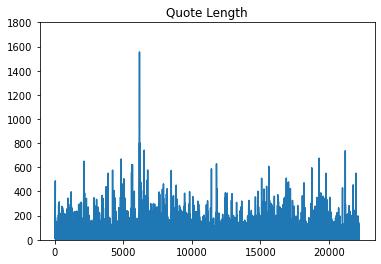

In [346]:
dfShake.plot(y='quoteLength',ylim=(0,1800),legend=None,title="Quote Length")

Check how many times there are 1 word lines:

In [347]:
count=0
for i in range(0,len(dfShake['PlayerLine'])):
    if(dfShake['quoteLength'][i] == 1):
        #print(dfShake.iloc[i])
        count=count+1

print('Count of 1 word lines =', count) 

Count of 1 word lines = 215


Check how many times there are 1555 word lines: This only happens one time, so we know if there are 1555 lines, the player=chorus. This observation can be seen in the above plot.

In [348]:
count=0
for i in range(0,len(dfShake['PlayerLine'])):
    if(dfShake['quoteLength'][i] == 1555):
        print(dfShake.iloc[i])
        count=count+1

print('Count of 1555 word lines =', count) 

Play                                                          Henry V
PlayerLinenumber                                                    1
Player                                                         Chorus
PlayerLine          O for a Muse of fire, that would ascend The br...
quoteLength                                                      1555
Name: 6172, dtype: object
Count of 1555 word lines = 1


Check how many times there are < and >= an average # word lines (35): The average number of words could be a good starting cutpoint for a decision tree.

In [349]:
count=0
for i in range(0,len(dfShake['PlayerLine'])):
    if(dfShake['quoteLength'][i] < 35):
        #print(dfShake.iloc[i])
        count=count+1

print('Count of <avg lines =', count) 

Count of <avg lines = 15701


In [350]:
count=0
for i in range(0,len(dfShake['PlayerLine'])):
    if(dfShake['quoteLength'][i] >= 35):
        #print(dfShake.iloc[i])
        count=count+1

print('Count of >=avg lines =', count) 

Count of >=avg lines = 6516


I will now create 2 additional features: a variable that contains the average sentence length of each quote (playerLine), and a variable that contains the number of sentences of each quote (playerLine). These variables could be useful in that they will provide more information related to the Player's style of speaking: if a player tends to respond curtly, with short sentences as opposed to a player that likes to speak in long rambling sentences.

In [351]:
def Avg(lst): 
    return sum(lst) / len(lst)

AvgSentLen=[] #New feature: avg sentence length
NumSentPerLine=[] #New feature: number of sentences per quote
sentenceLen=[] #sentence Lengths per quote
count=0
for i in range(0,len(dfShake['PlayerLine'])):
    tempQuote=dfShake['PlayerLine'][i].split()
    
    for j in range(0,len(tempQuote)):
        count=count+1
        if("." in tempQuote[j] or "?" in tempQuote[j] or "!" in tempQuote[j] or "--" in tempQuote[j]):
            sentenceLen.append(count)
            count=0
    if(len(sentenceLen)>0):
        AvgSentLen.append(Avg(sentenceLen))
        NumSentPerLine.append(len(sentenceLen))
    else:
        AvgSentLen.append(0)
        NumSentPerLine.append(0)
    sentenceLen.clear()

    
dfShake['AvgSentLen'] = AvgSentLen
dfShake['NumSentPerLine']=NumSentPerLine

In [352]:
dfShake.head()

,Play,PlayerLinenumber,Player,PlayerLine,quoteLength,AvgSentLen,NumSentPerLine
0,A Comedy of Errors,1.0,ADRIANA,"Neither my husband nor the slave return'd, Tha...",71,10.142857,7
1,A Comedy of Errors,1.0,AEGEON,"Proceed, Solinus, to procure my fall And by th...",16,16.000000,1
2,A Comedy of Errors,1.0,ANGELO,"I am sorry, sir, that I have hinder'd you, But...",25,25.000000,1
3,A Comedy of Errors,1.0,ANTIPHOLUS OF EPHESUS,"Good Signior Angelo, you must excuse us all, M...",166,20.750000,8
4,A Comedy of Errors,1.0,DROMIO OF SYRACUSE,The gold I gave to Dromio is laid up Safe at t...,186,13.285714,14


Check how many rows contain 0 sentence length. After visual observation of the quotes whose AvgSentLen is 0, the quotes are not empty. However, they end in a value different from ?, !, --, . so there is no good way to adjust the sentence length function without sacrificing the rest of the data. Therefore, since there are only 26 observations for which that happens, I drop them from the data.

In [353]:
count=0
for i in range(0,len(dfShake['AvgSentLen'])):
    if(dfShake['AvgSentLen'][i] < 1):
        #print(dfShake.iloc[i])
        count=count+1
        dfShake.drop([i],inplace=True, axis=0)

print('Count of 0 sentence length lines =', count) 

Count of 0 sentence length lines = 26


In [354]:
#dfShake.to_csv('finalData.csv')

## Classification and Conclusion

I use 2 methods for classification: Decision tree, and Random forest. I chose to use decision tree because of the ease of interpretation and visualization. Provided more time I would have liked to visualize the tree itself. I then wanted to run a random forest because it is a more robust version of decision trees (since it uses many trees as opposed to just one). Since my features are numerical I envisioned a decision tree where: if the playerLine has less than average number of words in the quote (the average words per quote is 35 as seen above) go left, otherwise go right. And as you navigate down the tree using the features and categorizations of said features you narrow the Player possibilities until you have a few left. There is one line spoken by the chorus that is 1555 words, so we would know if we follow this hypothetical decision tree to the right all the way we would find 'chorus' as the speaker. 

The results for both methods are very inaccurate, as seen below: the accuracy for both is around 0.7%. The reason for this is most likely because of the features I chose. All 3 features are fairly similar since they all deal with the length of the Playerline and therefore impart similar information to the model. Again provided more time I would have liked to create more features that impart better/more information to the models. I believe the accuracy rate of both were similar because: if the decision tree is already inaccurate, lots of decision trees via random forest aren't going to produce better results.

Additionally I would have liked to use different models, like logistic regression on my data. Since both decision trees and random forest use the same underlying tree logic, it would have been nice to try a different model on the data.

### Decision Tree

First, specify feature columns and target value (these are also used for the Random Forest model):

In [355]:
feature_cols = ['quoteLength', 'AvgSentLen', 'NumSentPerLine']
X = dfShake[feature_cols] # Features
y = dfShake.Player # Target variable

Then, split dataset into training set and test set.

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [357]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

This model is accurate 0.7% of the time. Since this value is so low, it is safe to say this model is very inaccurate.

In [358]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.007810153199158907


### Random Forest

In [359]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

This model is again accurate 0.7% of the time. As discussed earlier, the random forest results are similar to the decision tree results because if the decision tree is already inaccurate, lots of decision trees via random forest aren't going to produce better results.

In [360]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.007810153199158907


## Concluding Remarks

Overall, I spent most of my time cleaning the data, altering the layout of the data, and engineering new features from that data. Provided more time I would have liked to come up with better features as discussed earlier and use more classification models such as logistic regression. Some features that I thought of but didn't have time to implement were: Player speaking frequency variable (based on the number of lines they had in the play), a unique ID for each play (since plays are stored as strings here), a most used word variable (a measure of which players used popular words more often). Additionally, I would have liked to apply the classification models to smallers subsets of data (ie single plays) as opposed to the whole dataset. 